In [51]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [52]:
%config InlineBackend.figure_format = 'retina'

### 데이터 불러오기

In [2]:
file = glob.glob('./data/*.csv')
file

['./data/olist_sellers_dataset.csv',
 './data/product_category_name_translation.csv',
 './data/olist_orders_dataset.csv',
 './data/olist_order_items_dataset.csv',
 './data/olist_customers_dataset.csv',
 './data/olist_geolocation_dataset.csv',
 './data/olist_order_payments_dataset.csv',
 './data/olist_order_reviews_dataset.csv',
 './data/olist_products_dataset.csv']

In [3]:
seller_data = pd.read_csv(file[0])
product_category = pd.read_csv(file[1])
orders_data  = pd.read_csv(file[2])
items_data = pd.read_csv(file[3])
customer_data = pd.read_csv(file[4])
geolocation_data = pd.read_csv(file[5])
payments_data = pd.read_csv(file[6])
reviews_data  = pd.read_csv(file[7])
prodcuts_data = pd.read_csv(file[8])

In [4]:
seller_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
prodcuts_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
reviews_data.describe(include="object")

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


### 원하는 칼럼만 추출하여 Merge

In [16]:
reviews_df = reviews_data[["order_id","review_score"]]

In [17]:
orders_df = orders_data[["order_id","customer_id", "order_purchase_timestamp", "order_estimated_delivery_date"]]

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_purchase_timestamp       99441 non-null  object
 3   order_estimated_delivery_date  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [19]:
items_df = items_data[["order_id","price","freight_value"]]

In [20]:
reviews_orders = pd.merge(orders_df, reviews_df, on = "order_id", how ="outer")

In [21]:
iro_df = pd.merge(items_df, reviews_orders, on = "order_id", how="outer")
iro_df.head()

,order_id,price,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-29 00:00:00,5.0
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-15 00:00:00,4.0
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-02-05 00:00:00,5.0
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-20 00:00:00,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-17 00:00:00,5.0


In [22]:
iro_df["order_purchase_date"] = pd.to_datetime(iro_df["order_purchase_timestamp"])

In [23]:
iro_df["order_delivery_date"] = pd.to_datetime(iro_df["order_estimated_delivery_date"])

In [24]:
iro_df.head()

,order_id,price,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,review_score,order_purchase_date,order_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-29 00:00:00,5.0,2017-09-13 08:59:02,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-15 00:00:00,4.0,2017-04-26 10:53:06,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-02-05 00:00:00,5.0,2018-01-14 14:33:31,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-20 00:00:00,4.0,2018-08-08 10:00:35,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-17 00:00:00,5.0,2017-02-04 13:57:51,2017-03-17


In [25]:
iro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114092 non-null  object        
 1   price                          113314 non-null  float64       
 2   freight_value                  113314 non-null  float64       
 3   customer_id                    114092 non-null  object        
 4   order_purchase_timestamp       114092 non-null  object        
 5   order_estimated_delivery_date  114092 non-null  object        
 6   review_score                   113131 non-null  float64       
 7   order_purchase_date            114092 non-null  datetime64[ns]
 8   order_delivery_date            114092 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 8.7+ MB


### 배송기간 칼럼 추가

In [26]:
iro_df["delivery_period"] = iro_df["order_delivery_date"]-iro_df["order_purchase_date"]

In [27]:
iro_df.tail()

,order_id,price,freight_value,customer_id,order_purchase_timestamp,order_estimated_delivery_date,review_score,order_purchase_date,order_delivery_date,delivery_period
114087,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,2018-01-16 14:27:59,2018-02-06 00:00:00,1.0,2018-01-16 14:27:59,2018-02-06,20 days 09:32:01
114088,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,2018-08-31 16:13:44,2018-10-01 00:00:00,5.0,2018-08-31 16:13:44,2018-10-01,30 days 07:46:16
114089,a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,2f0524a7b1b3845a1a57fcf3910c4333,2018-09-06 18:45:47,2018-09-27 00:00:00,4.0,2018-09-06 18:45:47,2018-09-27,20 days 05:14:13
114090,a69ba794cc7deb415c3e15a0a3877e69,NaN,NaN,726f0894b5becdf952ea537d5266e543,2017-08-23 16:28:04,2017-09-15 00:00:00,1.0,2017-08-23 16:28:04,2017-09-15,22 days 07:31:56
114091,5fabc81b6322c8443648e1b21a6fef21,NaN,NaN,32c9df889d41b0ee8309a5efb6855dcb,2017-10-10 10:50:03,2017-10-23 00:00:00,1.0,2017-10-10 10:50:03,2017-10-23,12 days 13:09:57


In [28]:
# 필요없는 칼럼 제거
iro_df = iro_df.drop(columns = ["order_purchase_timestamp","order_estimated_delivery_date","order_purchase_date","order_delivery_date"])

In [29]:
iro_df["delivery_period"] = iro_df["delivery_period"].dt.days

### 상관관계 분석

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_85151/995627594.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iro_df.corr(), cmap="Greens", annot = True)


<AxesSubplot: >

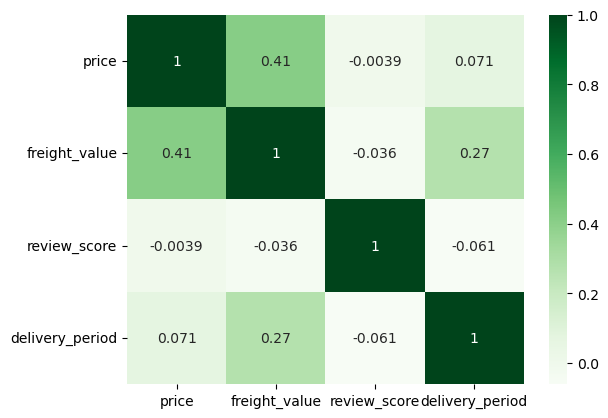

In [30]:
sns.heatmap(iro_df.corr(), cmap="Greens", annot = True)

### 재구매 고객 대상 데이터 분석

In [31]:
customer_unique = iro_df["customer_id"].unique()
customer_unique = customer_unique.tolist()

In [32]:
len(customer_unique)

99441

In [33]:
def customer_id (customer_id, customer_unique):
    num = 1
    for i in (customer_unique):
        if customer_id == i:
            return f"id_{num}"
        num += 1

In [34]:
iro_df["customer_id"] = iro_df["customer_id"].apply(lambda x: customer_id(x, customer_unique))

In [35]:
iro_dfg = iro_df.groupby(by = ["customer_id"]).mean()
iro_dfg

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_85151/4172516996.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iro_dfg = iro_df.groupby(by = ["customer_id"]).mean()


,price,freight_value,review_score,delivery_period
customer_id,,,,
id_1,58.90,13.29,5.0,15.0
id_10,53.99,11.40,4.0,20.0
id_100,14.00,50.85,5.0,26.0
id_1000,119.99,12.04,5.0,10.0
id_10000,169.90,12.39,4.0,14.0
...,...,...,...,...
id_9995,27.99,7.46,4.0,2.0
id_9996,103.97,25.04,4.0,20.0
id_9997,89.18,12.96,1.0,24.0


In [36]:
count = pd.DataFrame(iro_df["customer_id"].value_counts())
count

,customer_id
id_34717,22
id_50138,21
id_10460,20
id_65716,20
id_25584,15
...,...
id_35001,1
id_35000,1
id_34999,1
id_34998,1


In [37]:
count = count.rename(columns= {'customer_id':'구매횟수'})

In [42]:
iro_dfgj = iro_dfg.join(count, how = 'outer').sort_values("구매횟수", ascending = False)

In [43]:
iro_dfgj

,price,freight_value,review_score,delivery_period,구매횟수
id_34717,65.007273,12.623636,1.0,16.0,22
id_50138,1.514286,7.827143,1.0,11.0,21
id_65716,98.700000,14.440000,NaN,28.0,20
id_10460,100.000000,10.120000,1.0,13.0,20
id_60942,51.000000,1.200000,5.0,35.0,15
...,...,...,...,...,...
id_41513,399.000000,29.740000,4.0,15.0,1
id_41512,199.000000,32.140000,4.0,21.0,1
id_41511,32.640000,10.960000,5.0,27.0,1
id_41510,95.000000,13.330000,5.0,17.0,1


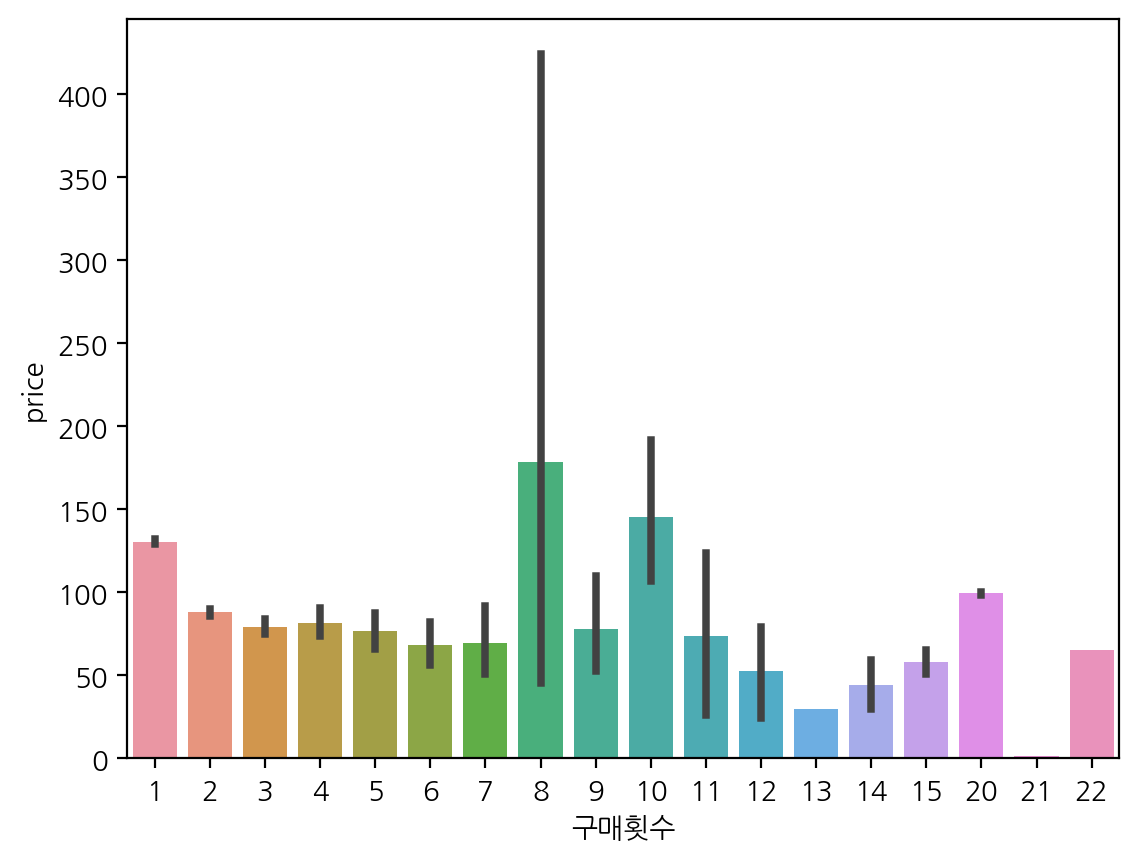

In [53]:
fig = sns.barplot(data = iro_dfgj, x = '구매횟수', y ="price")

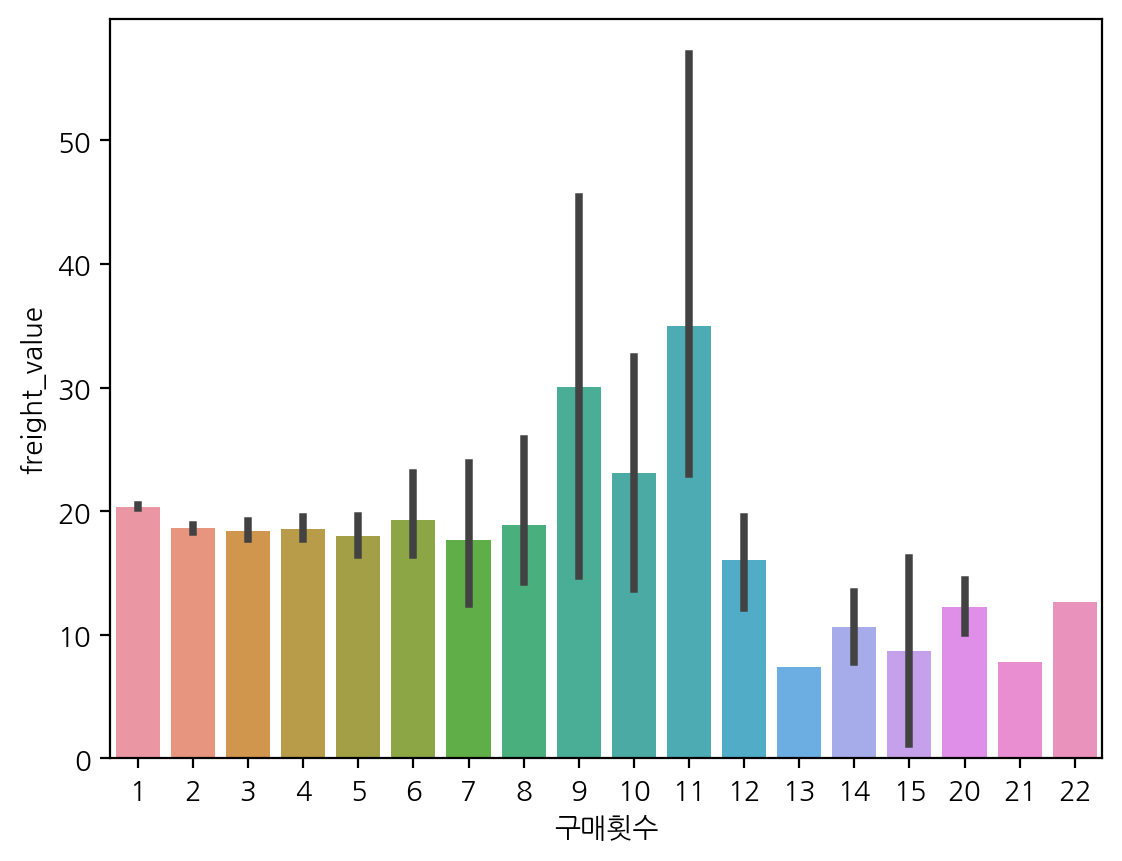

In [54]:
fig = sns.barplot(data = iro_dfgj, x = '구매횟수', y ="freight_value")

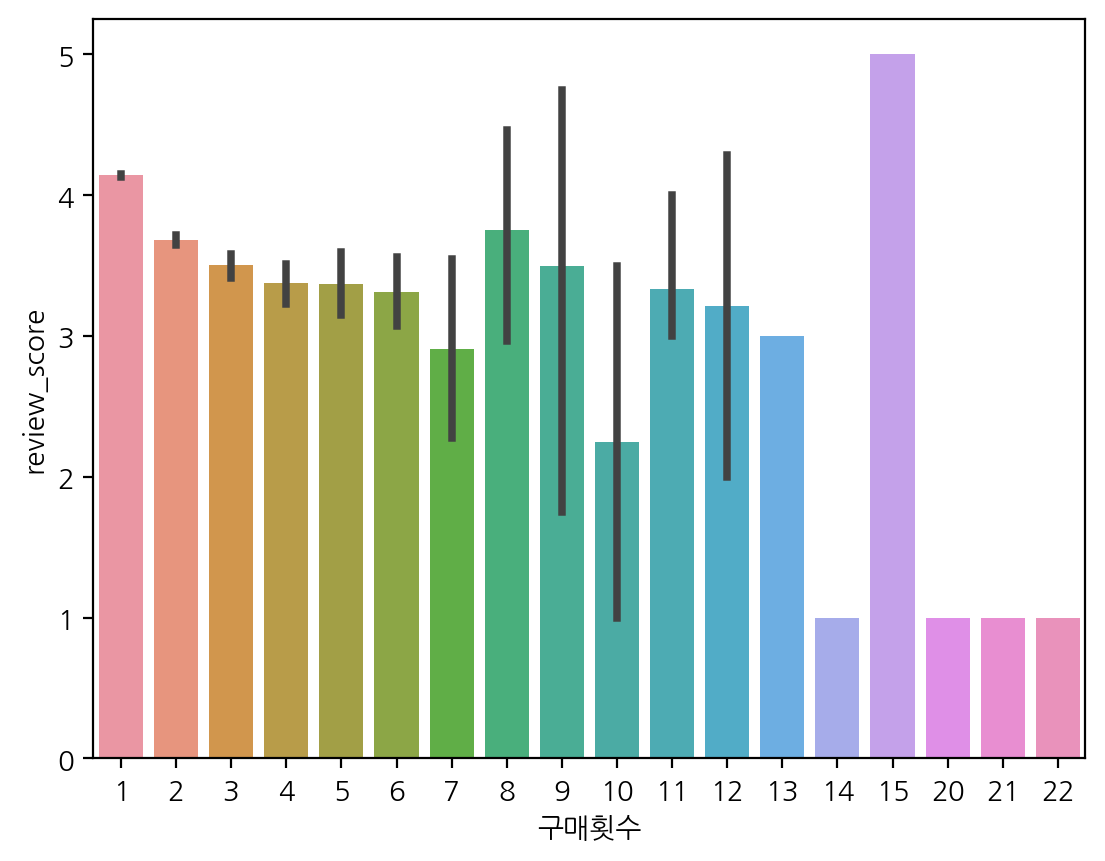

In [55]:
fig = sns.barplot(data = iro_dfgj, x = '구매횟수', y ="review_score")

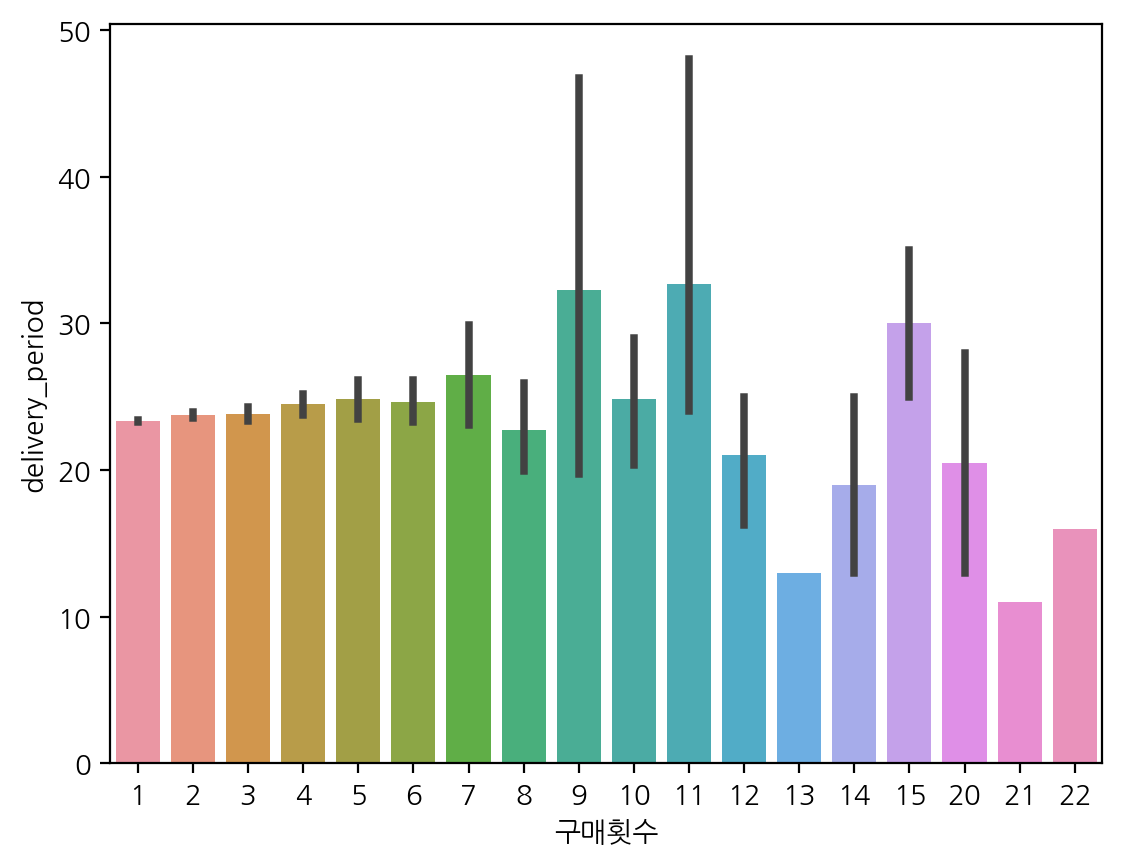

In [56]:
fig = sns.barplot(data = iro_dfgj, x = '구매횟수', y ="delivery_period")